In [1]:
import numpy as np
from blimpy import read_header, Waterfall, Filterbank

%matplotlib inline
import matplotlib.pyplot as plt

import sys, os, glob
sys.path.append("../../setigen")
import setigen as stg

/Users/bbrzycki/anaconda3/envs/breakthroughlisten27/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
tsamp = 18.253611008
fch1 = 6095.214842353016
df = -2.7939677238464355e-06

fchans = 1024
tchans = 16

fs = np.arange(fch1, fch1 + fchans*df, df)
ts = np.arange(0, tchans*tsamp, tsamp)

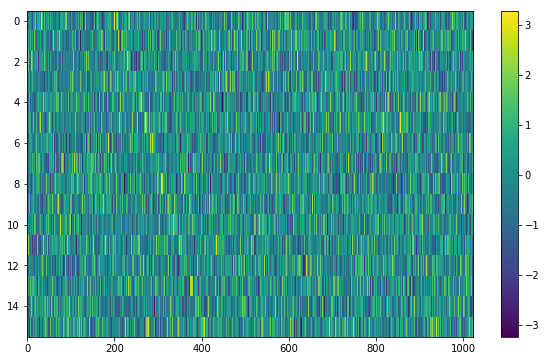

In [3]:
signal = stg.generate(ts,
                          fs,
                          stg.constant_path(f_start = fs[200], drift_rate = -0.000002),
                          stg.constant_t_profile(level = 2.0),
                          stg.box_f_profile(width = 0.00001),
                          stg.constant_bp_profile(level = 1.0))

fig = plt.figure(figsize=(10,6))
plt.imshow(stg.normalize(stg.inject_noise(signal)), aspect='auto')
plt.colorbar()

(514, 2.387835609792188e-06, 0.5)


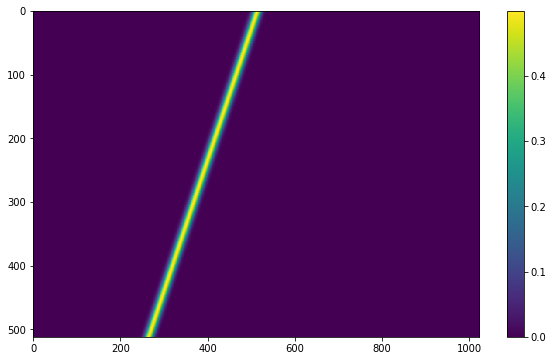

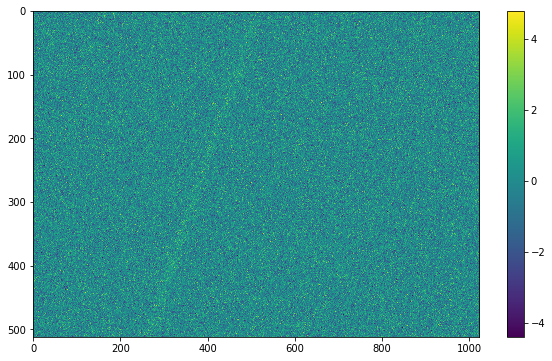

In [88]:
start_index = np.random.randint(0,fchans)
drift_rate = np.random.uniform(-start_index*df/(tsamp*tchans),
                               (fchans-1-start_index)*df/(tsamp*tchans))
#drift_rate = 0
level = np.random.uniform(0.5,5)

signal = stg.generate(ts,
                          fs,
                          stg.constant_path(f_start = fs[start_index], drift_rate = drift_rate),
                          stg.constant_t_profile(level = level),
                          stg.gaussian_f_profile(width = 0.00002),
                          stg.constant_bp_profile(level = 1.0))

fig = plt.figure(figsize=(10,6))
plt.imshow(signal, aspect='auto')
plt.colorbar()
fig = plt.figure(figsize=(10,6))
plt.imshow(stg.inject_noise(signal), aspect='auto')
# plt.imshow(stg.normalize(stg.inject_noise(signal), cols = 0, exclude = 0.0, use_median=False), aspect='auto')
plt.colorbar()
# plt.imshow(signal)

# normalized_signal = stg.normalize(stg.inject_noise(signal))
# plt.imsave('test_none.png', normalized_signal)
print(start_index, drift_rate, level)

(687, 6.283044327452584e-06, 0.9795545675781399)


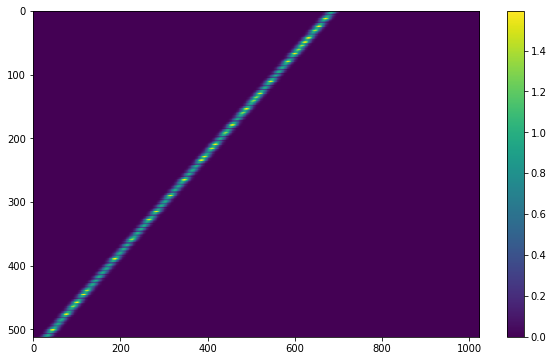

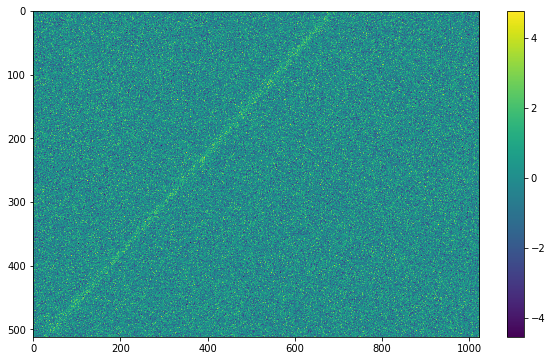

In [84]:
factor = 32
tsamp = 18.253611008 / factor
fch1 = 6095.214842353016
df = -2.7939677238464355e-06

fchans = 1024
tchans = 16 * factor

fs = np.arange(fch1, fch1 + fchans*df, df)
ts = np.arange(0, tchans*tsamp, tsamp)

start_index = np.random.randint(0,fchans)
drift_rate = np.random.uniform(-start_index*df/(tsamp*tchans),
                               (fchans-1-start_index)*df/(tsamp*tchans))
#drift_rate = 0
level = np.random.uniform(0.5,5)
period = np.random.uniform(2,4)
phase = np.random.uniform(0,period)
sigma = np.random.uniform(0.1, 2)
pulse_dir = 'rand'
width = np.random.uniform(np.random.uniform(0.1,2))
pnum = 10
amplitude = np.random.uniform(min(1, level/2.), level)

# level = 0.5
# period = 2
# phase = 0
# sigma = 2
# pulse_dir = 'rand'
# width = 2
# pnum = 10
# amplitude = 0.5

signal = stg.generate(ts,
                          fs,
                          stg.constant_path(f_start = fs[start_index], drift_rate = drift_rate),
                          stg.periodic_gaussian_t_profile(period, phase, sigma, pulse_dir, width, pnum, amplitude, level),
                          stg.gaussian_f_profile(width = 0.00002),
                          stg.constant_bp_profile(level = 1.0),
                          integrate = True)

fig = plt.figure(figsize=(10,6))
plt.imshow(signal, aspect='auto')
plt.colorbar()
fig = plt.figure(figsize=(10,6))
plt.imshow(stg.inject_noise(signal), aspect='auto')
# plt.imshow(stg.normalize(stg.inject_noise(signal), cols = 0, exclude = 0.0, use_median=False), aspect='auto')
plt.colorbar()
# plt.imshow(signal)

# normalized_signal = stg.normalize(stg.inject_noise(signal))
# plt.imsave('test_none.png', normalized_signal)
print(start_index, drift_rate, level)

In [89]:
import errno
set = 'set02'
labels = ['pulsed_nonzero', 'pulsed_zero', 'constant_nonzero', 'constant_zero', 'noise']
dirs = ['../data/%s/train/%s/' % (set, label) for label in labels] \
        + ['../data/%s/validation/%s/' % (set, label) for label in labels] 

for d in dirs:
    try:
        os.makedirs(d)
    except OSError as e:
        if e.errno != errno.EEXIST:
            raise

In [90]:
# Generate training and validation data!
datasets = [('train', 2000), ('validation', 500)]

for name, num in datasets:
    
    for i in range(num):

        output_fn = '../data/'+set+'/%s/%s/%s_%04d.png' % (name,'pulsed_nonzero','pulsed_nonzero',i)

        start_index = np.random.randint(0,fchans)
        drift_rate = np.random.uniform(-start_index*df/(tsamp*tchans),
                                       (fchans-1-start_index)*df/(tsamp*tchans))
        #drift_rate = 0
        level = np.random.uniform(0.5,5)
        period = np.random.uniform(2,4)
        phase = np.random.uniform(0,period)
        sigma = np.random.uniform(0.1, 2)
        pulse_dir = 'rand'
        width = np.random.uniform(np.random.uniform(0.1,2))
        pnum = 10
        amplitude = np.random.uniform(min(1, level/2.), level)

        signal = stg.generate(ts,
                                  fs,
                                  stg.constant_path(f_start = fs[start_index], drift_rate = drift_rate),
                                  stg.periodic_gaussian_t_profile(period, phase, sigma, pulse_dir, width, pnum, amplitude, level),
                                  stg.gaussian_f_profile(width = 0.00002),
                                  stg.constant_bp_profile(level = 1.0),
                                  integrate = True)

#         normalized_signal = stg.normalize(stg.inject_noise(signal))
        normalized_signal = (stg.inject_noise(signal))

        plt.imsave(output_fn, normalized_signal)
        print('Saved %s of %s pulsed_nonzero data for %s' % (i, num, name))
        
    for i in range(num):

        output_fn = '../data/'+set+'/%s/%s/%s_%04d.png' % (name,'pulsed_zero','pulsed_zero',i)

        start_index = np.random.randint(0,fchans)
        drift_rate = 0
        
        level = np.random.uniform(0.5,5)
        period = np.random.uniform(2,4)
        phase = np.random.uniform(0,period)
        sigma = np.random.uniform(0.1, 2)
        pulse_dir = 'rand'
        width = np.random.uniform(np.random.uniform(0.1,2))
        pnum = 10
        amplitude = np.random.uniform(min(1, level/2.), level)


        signal = stg.generate(ts,
                                  fs,
                                  stg.constant_path(f_start = fs[start_index], drift_rate = drift_rate),
                                  stg.periodic_gaussian_t_profile(period, phase, sigma, pulse_dir, width, pnum, amplitude, level),
                                  stg.gaussian_f_profile(width = 0.00002),
                                  stg.constant_bp_profile(level = 1.0),
                                  integrate = True)
        
        normalized_signal = (stg.inject_noise(signal))

        plt.imsave(output_fn, normalized_signal)
        print('Saved %s of %s pulsed_zero data for %s' % (i, num, name))
    
    for i in range(num):

        output_fn = '../data/'+set+'/%s/%s/%s_%04d.png' % (name,'constant_nonzero','constant_nonzero',i)

        start_index = np.random.randint(0,fchans)
        drift_rate = np.random.uniform(-start_index*df/(tsamp*tchans),
                                       (fchans-1-start_index)*df/(tsamp*tchans))
        level = np.random.uniform(0.1,5)

        signal = stg.generate(ts,
                                  fs,
                                  stg.constant_path(f_start = fs[start_index], drift_rate = drift_rate),
                                  stg.constant_t_profile(level = level),
                                  stg.gaussian_f_profile(width = 0.00002),
                                  stg.constant_bp_profile(level = 1.0))

#         normalized_signal = stg.normalize(stg.inject_noise(signal))
        normalized_signal = (stg.inject_noise(signal))

        plt.imsave(output_fn, normalized_signal)
        print('Saved %s of %s constant_nonzero data for %s' % (i, num, name))
        
    for i in range(num):

        output_fn = '../data/'+set+'/%s/%s/%s_%04d.png' % (name,'constant_zero','constant_zero',i)

        start_index = np.random.randint(0,fchans)
        drift_rate = 0
        level = np.random.uniform(0.1,5)

        signal = stg.generate(ts,
                                  fs,
                                  stg.constant_path(f_start = fs[start_index], drift_rate = drift_rate),
                                  stg.constant_t_profile(level = level),
                                  stg.gaussian_f_profile(width = 0.00002),
                                  stg.constant_bp_profile(level = 1.0))

        normalized_signal = (stg.inject_noise(signal))

        plt.imsave(output_fn, normalized_signal)
        print('Saved %s of %s constant_zero data for %s' % (i, num, name))

    for i in range(num):

        output_fn = '../data/'+set+'/%s/%s/%s_%04d.png' % (name,'noise','noise',i)

        # level = 0 for no signal
        signal = stg.generate(ts,
                                  fs,
                                  stg.constant_path(f_start = fs[0], drift_rate = 0),
                                  stg.constant_t_profile(level = 0),
                                  stg.gaussian_f_profile(width = 0.00002),
                                  stg.constant_bp_profile(level = 1.0))

        normalized_signal = (stg.inject_noise(signal))

        plt.imsave(output_fn, normalized_signal) 
        print('Saved %s of %s noise data for %s' % (i, num, name))

Saved 0 of 2000 pulsed_nonzero data for train
Saved 1 of 2000 pulsed_nonzero data for train
Saved 2 of 2000 pulsed_nonzero data for train
Saved 3 of 2000 pulsed_nonzero data for train
Saved 4 of 2000 pulsed_nonzero data for train
Saved 5 of 2000 pulsed_nonzero data for train
Saved 6 of 2000 pulsed_nonzero data for train
Saved 7 of 2000 pulsed_nonzero data for train
Saved 8 of 2000 pulsed_nonzero data for train
Saved 9 of 2000 pulsed_nonzero data for train
Saved 10 of 2000 pulsed_nonzero data for train
Saved 11 of 2000 pulsed_nonzero data for train
Saved 12 of 2000 pulsed_nonzero data for train
Saved 13 of 2000 pulsed_nonzero data for train
Saved 14 of 2000 pulsed_nonzero data for train
Saved 15 of 2000 pulsed_nonzero data for train
Saved 16 of 2000 pulsed_nonzero data for train
Saved 17 of 2000 pulsed_nonzero data for train
Saved 18 of 2000 pulsed_nonzero data for train
Saved 19 of 2000 pulsed_nonzero data for train
Saved 20 of 2000 pulsed_nonzero data for train
Saved 21 of 2000 pulsed